In [23]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
from mpl_toolkits import mplot3d
from math import sqrt
import warnings
import time

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model


import pickle
import os
import random

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["savefig.format"] = 'tiff'
warnings.filterwarnings("ignore")

In [24]:
seed = 115
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [25]:
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=3)

In [26]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 160:
    return lr
  else:
    return lr * np.exp(-0.1)

callback = keras.callbacks.LearningRateScheduler(scheduler)

# Neural Network
def Neural_network():
    init = keras.initializers.random_normal()
    model=Sequential()
    model.add(layers.Dense(64,activation='relu',kernel_initializer=init, input_dim=scaled_DF.shape[1]))
    model.add(layers.Dropout(0.1))


    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))


    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))


    model.add(layers.Dense(1,kernel_initializer=init,activation = 'linear'))


    optimize=tf.keras.optimizers.Adam()

    model.compile(optimizer=optimize,
                    loss='mse',
                    )
    return model

In [27]:
# Funtion to train the model
def training_model(X_train,Y_train,model):
    history=model.fit(X_train,Y_train,epochs=200,batch_size=32,verbose=0,callbacks=[callback])
    return history

In [28]:
# To print losses
def plots():

    f, ax = plt.subplots(1,1)
    actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
    predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

    actual=np.array(scaler.inverse_transform(np.array(trainY).reshape(-1,1)))
    predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))

    plt.rcParams["figure.figsize"] = (12,12)
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams["savefig.format"] = 'tiff'

    sns.set(style='whitegrid')
    sns.set_context("paper", font_scale=3)

    plt.scatter(actual_test,predicted_test, color='purple', label='Test', linewidths=1, edgecolors='black', s=75)
    sns.regplot(x=actual,y=predicted, color='orangered', label='Train', scatter_kws={'s':40, 'alpha':0.7, 'edgecolor':'black'})

    print("R square (R^2) for train:                 %f" % r2_score(actual,predicted))
    print("Mean absolute error (MAE)- Test:      %f" % mean_absolute_error(actual_test,predicted_test))
    print("Mean squared error (MSE)- Test:       %f" % mean_squared_error(actual_test,predicted_test))
    print("Root mean squared error (RMSE) - Test: %f" % sqrt(mean_squared_error(actual_test,predicted_test)))
    print("R square (R^2) - Test:                 %f" % r2_score(actual_test,predicted_test))


    plt.xlabel("TC+DA (Actual)")
    plt.ylabel('Predicted')

    anchored_text = AnchoredText("R\u00b2 Score_train  "+str(round(r2_score(actual,predicted),3))+'\n'"R\u00b2 Score_test  "+str(round(r2_score(actual_test,predicted_test),3)), loc=2,prop=dict(size=20))

    ax.add_artist(anchored_text)

    plt.legend(loc = 9, prop={'size': 20})
    plt.tight_layout()
    plt.savefig(str(model)[1:6], bbox_inches='tight')

In [29]:
def defining_model(x):
    if x == 'mlr':
      model = LinearRegression()
    elif x=='adboost':
      model = AdaBoostRegressor(random_state=42)
    elif x=='xtratree':
      model = ExtraTreesRegressor(random_state=42)
    elif x=='bagging':
      model = BaggingRegressor(random_state=42)
    elif x=='pls':
      model = PLSRegression()
    elif x=='rndmfrst':
      model = RandomForestRegressor(random_state=42)
    elif x=='knn':
      model = KNeighborsRegressor()
    elif x=='svr':
      model = SVR()
    else:
      print("wrong selection")
    return model

In [30]:
df = pd.read_csv(
    'data.csv'
)

In [50]:
df.shape


(99, 253)

In [31]:
df.head(2)

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI8,JGI9,JGI10,TopoShapeIndex,Lipinski,GhoseFilter,Smiles,TC+DA,Reagent ID Number,TOR
0,13.647975,0,1,2.562927,1.278646,12,0,0,4,0,...,0.000000,0.0,0.0,0.5,0,1,[H]C1=CC=C([S+](C(F)(F)F)C2=C3C=CC=C2)C3=C1,42.7,Ea1a,Chalc. Salts
1,15.062188,0,1,2.571754,1.272459,12,0,0,5,0,...,0.005102,0.0,0.0,1.0,0,1,FC([S+]1C2=CC=C(OC)C=C2C3=C1C=CC=C3)(F)F,45.5,Ea1b,Chalc. Salts


In [32]:
Train_C, Test_C = train_test_split(df[df['TOR'] == 'Chalc. Salts'], test_size=0.20, random_state=42)
Train_H, Test_H = train_test_split(df[df['TOR'] == 'HIR'], test_size=0.20, random_state=42)
Train_S, Test_S = train_test_split(df[df['TOR'] == 'Sulfoximines'], test_size=0.20, random_state=42)

In [33]:
Train = pd.concat([Train_C, Train_H, Train_S])
Test = pd.concat([Test_C, Test_H, Test_S])

In [34]:
Train.head(2)

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI8,JGI9,JGI10,TopoShapeIndex,Lipinski,GhoseFilter,Smiles,TC+DA,Reagent ID Number,TOR
3,14.464471,0,1,2.570047,1.261124,12,0,0,5,0,...,0.000000,0.000000,0.0,0.75,0,1,FC1=CC=C([S+](C(F)(F)F)C2=C3C=CC=C2)C3=C1,42.1,Ea1d,Chalc. Salts
53,15.919125,0,1,2.529823,1.258776,12,0,0,5,0,...,0.008421,0.012346,0.0,0.80,0,0,BrC(C=C1)=CC=C1C2=CC3=CC=CC=C3[S+]2C(F)(F)F,38.8,Ea6h,Chalc. Salts


In [35]:
# Combine Train and test for feature engineering
DF_raw = pd.concat([Train, Test],ignore_index=True)
DF_data = DF_raw.copy()

In [36]:
# Removing Unwanted columns
DF_data=DF_data.drop(['Smiles', 'Reagent ID Number', 'TOR'],axis=1)
DF_data

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI4,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,Lipinski,GhoseFilter,TC+DA
0,14.464471,0,1,2.570047,1.261124,12,0,0,5,0,...,0.052921,0.035306,0.006944,0.000000,0.000000,0.0,0.75,0,1,42.1
1,15.919125,0,1,2.529823,1.258776,12,0,0,5,0,...,0.060764,0.016291,0.026986,0.008421,0.012346,0.0,0.80,0,0,38.8
2,17.540187,0,1,2.598182,1.214889,12,0,0,7,1,...,0.060661,0.039285,0.010825,0.015983,0.000000,0.0,0.80,0,0,39.3
3,15.947634,0,1,2.574516,1.246792,12,0,0,7,1,...,0.049159,0.034245,0.025347,0.005102,0.000000,0.0,1.00,0,1,36.7
4,16.891548,0,1,2.579684,1.215807,12,0,0,7,0,...,0.049745,0.035886,0.030315,0.005102,0.000000,0.0,1.00,0,0,39.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,12.720699,0,0,2.548650,1.162415,6,0,0,5,0,...,0.082005,0.060612,0.000000,0.000000,0.000000,0.0,0.75,1,1,79.8
95,11.904202,0,0,2.539548,1.188258,6,0,0,5,0,...,0.069286,0.040000,0.000000,0.000000,0.000000,0.0,1.00,1,1,79.7
96,15.015593,0,0,2.618108,1.148373,9,0,0,12,2,...,0.062133,0.039955,0.000000,0.000000,0.000000,0.0,0.75,1,1,55.5
97,15.015593,0,0,2.617560,1.148421,9,0,0,12,2,...,0.064713,0.033476,0.026786,0.000000,0.000000,0.0,1.00,1,1,55.1


In [37]:
DF_data = DF_data[['nBase', 'EState_VSA8', 'ATSC3i', 'AATS0v', 'PEOE_VSA13', 'TC+DA']]

In [38]:
DF_data.shape

(99, 6)

In [39]:

# Scaling the whole DataFrame

scaler = StandardScaler()
scaled_DF = pd.DataFrame(scaler.fit_transform(DF_data.iloc[:,:-1]))
scaled_DF.columns = DF_data.iloc[:,:-1].columns

scaled_DF['TC+DA'] = scaler.fit_transform(np.array(DF_data['TC+DA']).reshape(-1,1))
scaled_DF

display(scaled_DF)

,nBase,EState_VSA8,ATSC3i,AATS0v,PEOE_VSA13,TC+DA
0,0.789272,-0.442679,-0.019191,0.451015,-0.481007,-0.732758
1,0.789272,2.589817,-0.640711,0.920259,-0.481007,-0.959047
2,0.789272,-0.442679,-0.181427,-0.581242,0.927668,-0.924761
3,0.789272,-0.442679,-0.193488,0.348594,0.927668,-1.103050
4,0.789272,-0.442679,-0.679246,0.348225,-0.481007,-0.931618
...,...,...,...,...,...,...
94,-1.266990,-0.442679,1.155534,-1.166487,-0.481007,1.852431
95,-1.266990,-0.442679,1.277281,-0.734606,-0.481007,1.845574
96,-1.266990,0.274615,1.189372,0.781663,3.410279,0.186116
97,-1.266990,0.274615,1.189372,0.781663,3.410279,0.158687


In [40]:
DF_target = scaled_DF[['TC+DA']]
scaled_DF.drop('TC+DA',axis=1,inplace=True)

display(scaled_DF)
display(DF_target)

,nBase,EState_VSA8,ATSC3i,AATS0v,PEOE_VSA13
0,0.789272,-0.442679,-0.019191,0.451015,-0.481007
1,0.789272,2.589817,-0.640711,0.920259,-0.481007
2,0.789272,-0.442679,-0.181427,-0.581242,0.927668
3,0.789272,-0.442679,-0.193488,0.348594,0.927668
4,0.789272,-0.442679,-0.679246,0.348225,-0.481007
...,...,...,...,...,...
94,-1.266990,-0.442679,1.155534,-1.166487,-0.481007
95,-1.266990,-0.442679,1.277281,-0.734606,-0.481007
96,-1.266990,0.274615,1.189372,0.781663,3.410279
97,-1.266990,0.274615,1.189372,0.781663,3.410279


,TC+DA
0,-0.732758
1,-0.959047
2,-0.924761
3,-1.103050
4,-0.931618
...,...
94,1.852431
95,1.845574
96,0.186116
97,0.158687


In [41]:
trainX = scaled_DF[:len(Train)]
testX = scaled_DF[len(Train):]

trainY = DF_target[:len(Train)]
testY = DF_target[len(Train):]

Average validation R2 score after crossvalidation :  0.855898176119147
Average validation rmse score after crossvalidation :  5.183726909512126


Training Accuracy :  0.9999733373358578
R square (R^2) for train:                 0.999973
Mean absolute error (MAE)- Test:      2.882477
Mean squared error (MSE)- Test:       14.619379
Root mean squared error (RMSE) - Test: 3.823530
R square (R^2) - Test:                 0.943200


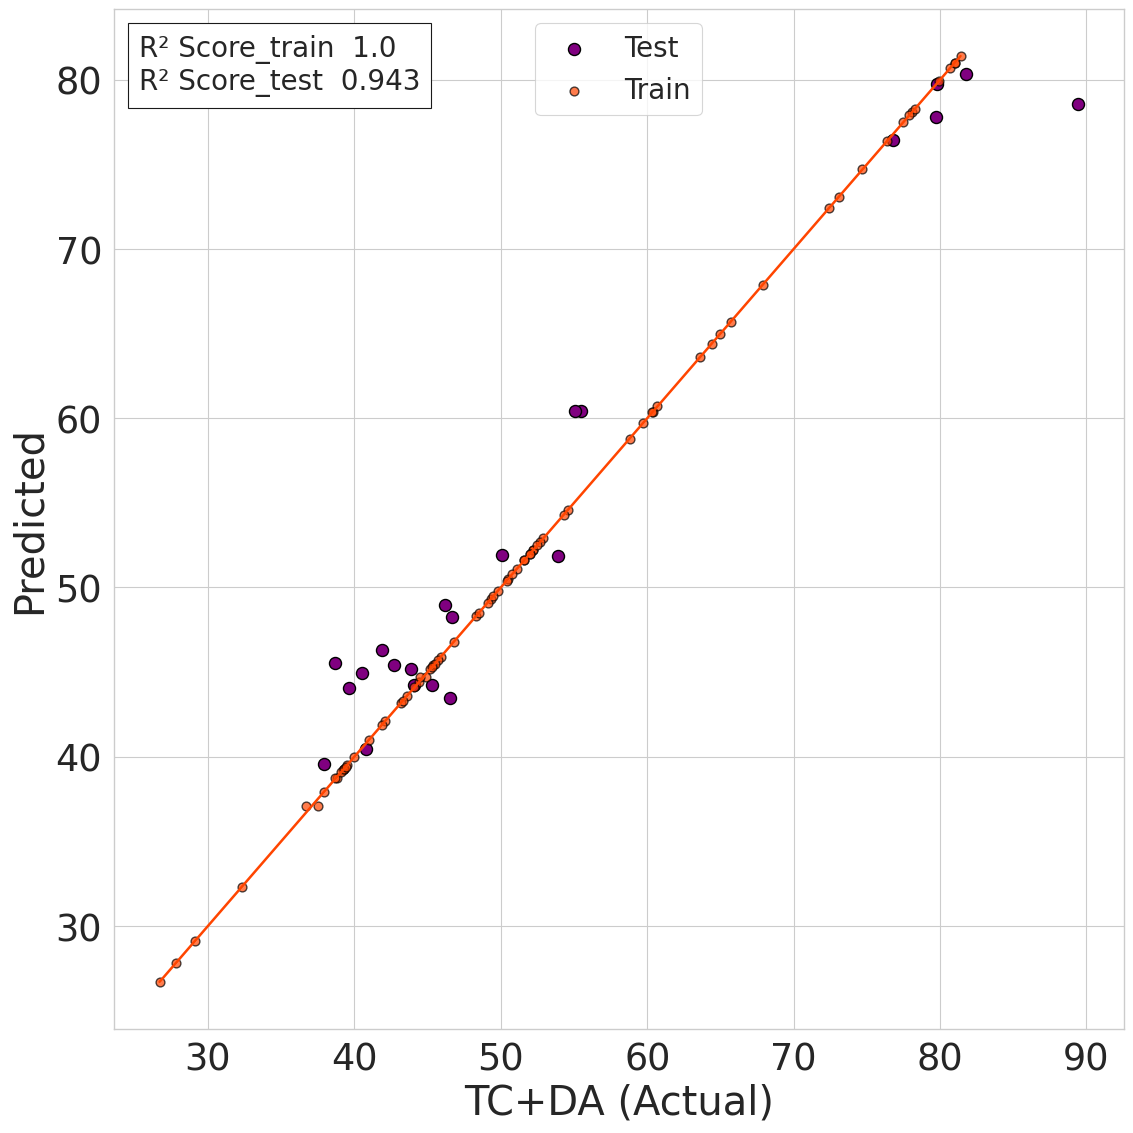

In [51]:
# Extra Tree Regressor
model = defining_model(x = 'xtratree')
kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'xtratree')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Average validation R2 score after crossvalidation :  0.8366278767585754
Average validation rmse score after crossvalidation :  5.577093549328022
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training Accuracy :  0.9644038029131342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R square (R^2) for train:                 0.964404
Mean absolute error (MAE)- Test:      2.622366
Mean squared error (MSE)- Test:       12.109739
Root mean squared error (RMSE) - Test: 3.479905
R square (R^2) - Test:                 0.952950


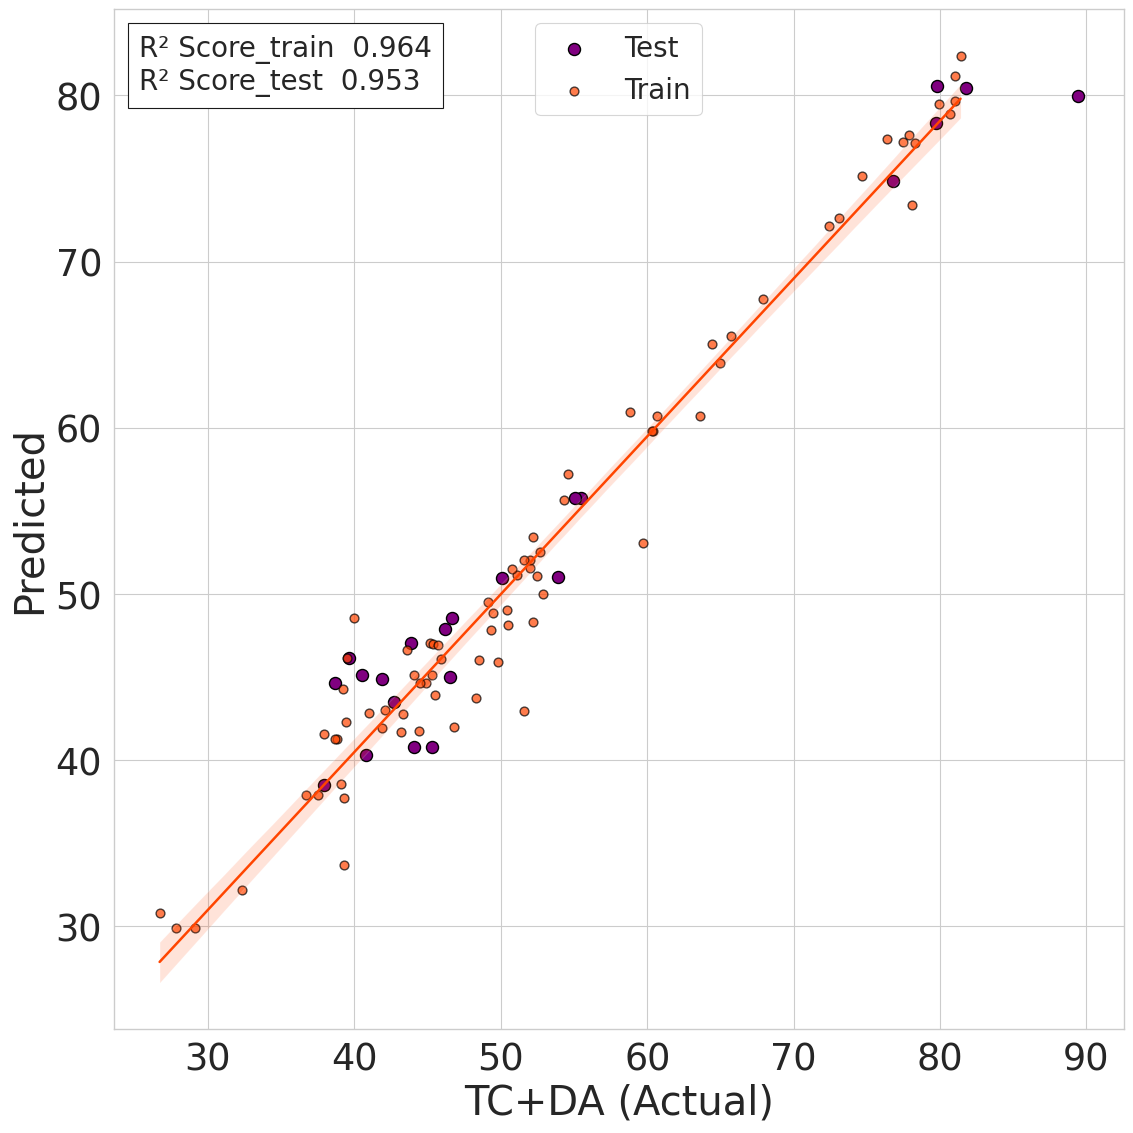

In [45]:
model = Neural_network()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model = Neural_network()
  training_model(trainX.iloc[train],trainY.iloc[train],model)
  scores.append(r2_score(trainY.iloc[valid],model.predict(trainX.iloc[valid])))

  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data

model = Neural_network()
training_model(trainX,trainY,model)
#actual = trainY
#predicted = model.predict(trainX)

actual=np.array(scaler.inverse_transform(np.array(trainY)))
predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))
# model.save("nn.h5")
# model.save('nn.keras')
score = r2_score(actual,predicted)
print("\n\nTraining Accuracy : ",score) # Training Accuracy
plots()

In [46]:
model = keras.models.load_model('nn.keras')

In [47]:
trainX.shape

(77, 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
R square (R^2) for train:                 0.962308
Mean absolute error (MAE)- Test:      2.939262
Mean squared error (MSE)- Test:       14.750763
Root mean squared error (RMSE) - Test: 3.840672
R square (R^2) - Test:                 0.942689


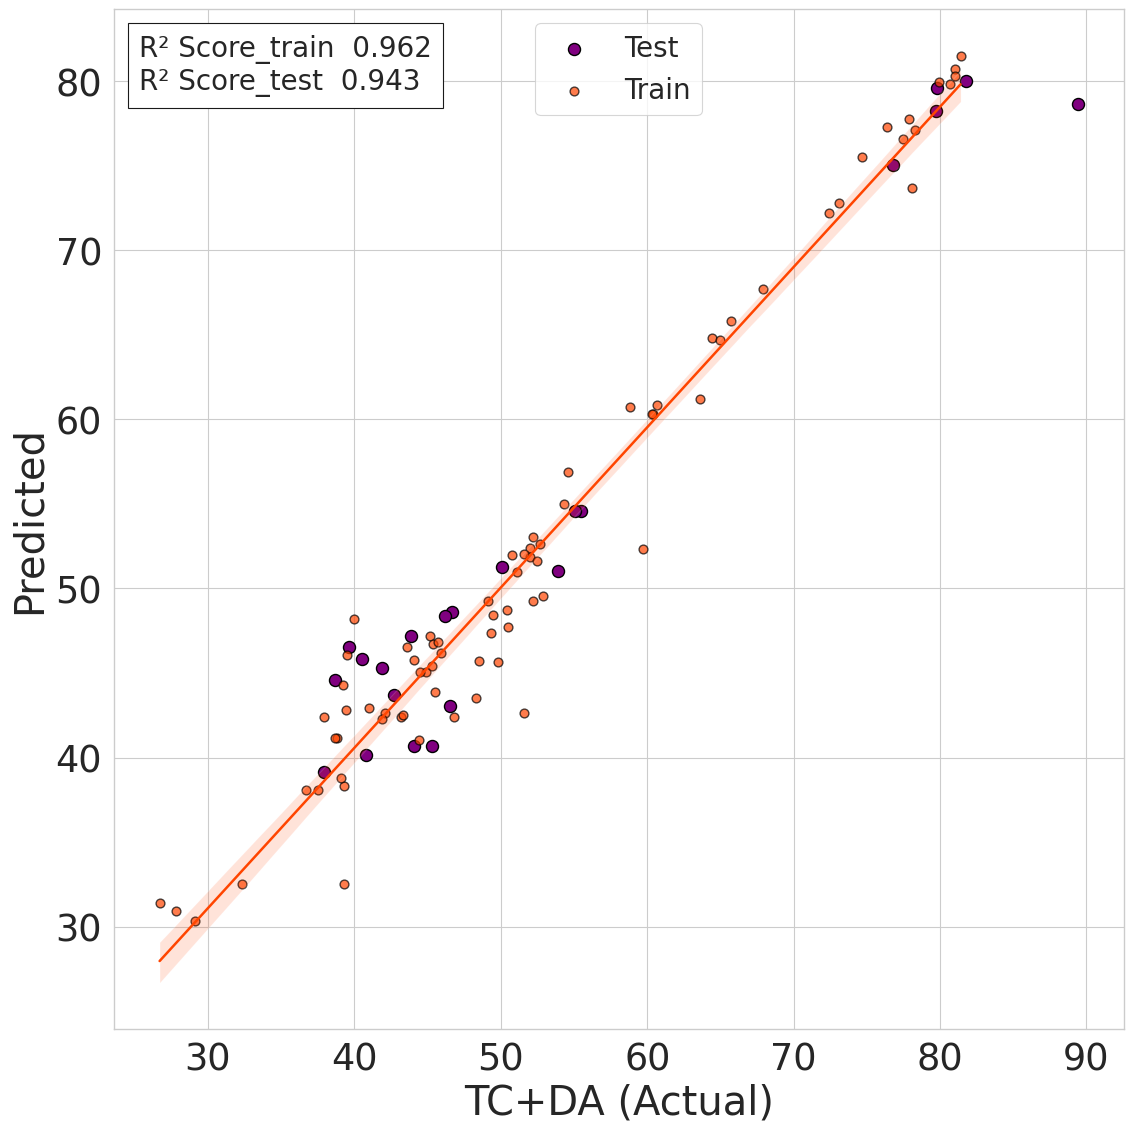

In [48]:
plots()